In [96]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import uuid

In [97]:
df = pd.read_excel("Data_for_KEA.xlsx")


Her skal vi have tilføjet en nogle ID-værdier til datasættet.

In [98]:
unique_ids = [uuid.uuid4() for _ in range(len(df))]
df['ID'] = unique_ids
df = df.drop(columns = "Total activities")
df = df.drop(columns = "Organization")
df = df.drop(columns = "Title (Project's name)")
df = df.drop(columns = "How we got the lead?")
df = df.drop(columns = "Contact person")
df = df.drop(columns = "Creator")
df = df.drop(columns = "Lost reason")
df = df.drop(columns = "Owner")
df = df.drop(columns = "Status")
print(df)

      Project's price (DKK)      Deal created on             Won time  \
0                  22510.80  2018-08-09 17:10:16  2018-08-10 14:56:09   
1                  25012.00  2017-01-26 08:49:17                  NaN   
2                    845.00  2020-05-18 09:38:27                  NaN   
3                  29363.75  2021-09-13 13:09:39                  NaN   
4                  42250.00  2017-02-09 09:29:18                  NaN   
...                     ...                  ...                  ...   
3654               67600.00  2019-05-05 08:18:37                  NaN   
3655              929500.00  2017-10-26 15:26:23                  NaN   
3656               15632.50  2021-02-24 13:01:47                  NaN   
3657              189280.00  2017-02-09 09:05:29                  NaN   
3658              591500.00  2017-02-09 09:14:58                  NaN   

           Deal closed on  Email messages count  \
0     2018-08-10 14:56:09                     0   
1     2017-01-30 12:4

In [99]:
df["Deal created on"] = pd.to_datetime(df["Deal created on"])
df["Won time"] = pd.to_datetime(df["Won time"])
df["Deal closed on"] = pd.to_datetime(df["Deal closed on"])
df['Days_to_win'] = (df["Won time"] - df["Deal created on"]).dt.days
df['Days_to_close'] = (df["Deal closed on"] - df["Deal created on"]).dt.days
print(df)


      Project's price (DKK)     Deal created on            Won time  \
0                  22510.80 2018-08-09 17:10:16 2018-08-10 14:56:09   
1                  25012.00 2017-01-26 08:49:17                 NaT   
2                    845.00 2020-05-18 09:38:27                 NaT   
3                  29363.75 2021-09-13 13:09:39                 NaT   
4                  42250.00 2017-02-09 09:29:18                 NaT   
...                     ...                 ...                 ...   
3654               67600.00 2019-05-05 08:18:37                 NaT   
3655              929500.00 2017-10-26 15:26:23                 NaT   
3656               15632.50 2021-02-24 13:01:47                 NaT   
3657              189280.00 2017-02-09 09:05:29                 NaT   
3658              591500.00 2017-02-09 09:14:58                 NaT   

          Deal closed on  Email messages count  \
0    2018-08-10 14:56:09                     0   
1    2017-01-30 12:40:57                     0 

Vi tjækker for duplicates, for at sikre er ikke er nogle i datasættet

Eftersom der ikke var nogle duplicates eftersom row number er det sammme gør vi ikke mere. 

In [103]:
df.isna()


,Project's price (DKK),Deal created on,Won time,Deal closed on,Email messages count,ID,Days_to_win,Days_to_close
0,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,True,False
3,False,False,True,False,False,False,True,False
4,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...
3654,False,False,True,False,False,False,True,False
3655,False,False,True,False,False,False,True,False
3656,False,False,True,False,False,False,True,False
3657,False,False,True,False,False,False,True,False


In [104]:
df.isna().any(axis=1)

0       False
1        True
2        True
3        True
4        True
        ...  
3654     True
3655     True
3656     True
3657     True
3658     True
Length: 3659, dtype: bool

Nu sletter vi de column vi ikke kan bruge her er "Total activities" en column som ikke giver os meget viden og vi sletter derfor denne.

In [105]:
df.isna().any(axis=1).sum()


1923

Her kigges der på alle de værdier som er 0 og dem fjerner vi

In [107]:
df = df.dropna(axis=0)
df

,Project's price (DKK),Deal created on,Won time,Deal closed on,Email messages count,ID,Days_to_win,Days_to_close
0,22510.800,2018-08-09 17:10:16,2018-08-10 14:56:09,2018-08-10 14:56:09,0,216c6ad4-df5a-441b-943d-72436cbd8d37,0.0,0.0
5,50024.000,2021-01-08 06:01:30,2021-01-25 16:36:35,2021-01-25 16:36:35,26,fb0bd3e5-0110-4ff7-8a1a-9c9173769de1,17.0,17.0
34,3126.500,2023-10-10 15:09:38,2023-10-17 11:57:55,2023-10-17 11:57:55,3,f38d7012-6fe9-4d2f-bf35-05dc678ba0d2,6.0,6.0
35,4689.750,2023-09-15 10:55:13,2023-09-26 08:56:28,2023-09-26 08:56:28,3,be27e680-8af6-4814-a3e2-6dbced888411,10.0,10.0
36,6253.000,2023-09-19 14:57:20,2023-09-19 15:04:09,2023-09-19 15:04:09,3,2446f948-abe8-40c2-98d8-ee5becc4446c,0.0,0.0
...,...,...,...,...,...,...,...,...
3646,144748.500,2020-03-06 09:18:46,2020-03-09 14:41:06,2020-03-09 14:41:06,2,b6a3b353-f4b4-41f7-a594-6566407d781c,3.0,3.0
3647,297778.000,2022-04-26 11:49:55,2022-05-25 14:21:10,2022-05-25 14:21:10,2,6c8983e9-81c2-4297-a36c-1b2b8e38bcf2,29.0,29.0
3648,762866.000,2017-08-17 11:09:49,2017-09-27 08:54:40,2017-09-27 08:54:40,0,0bcab9cc-e20e-4bde-99a4-98e96d4d1785,40.0,40.0
3651,37479.975,2022-11-11 16:37:38,2022-11-11 16:38:35,2022-11-11 16:38:35,1,e6d81968-371f-42e4-bda3-92df5e44aae7,0.0,0.0


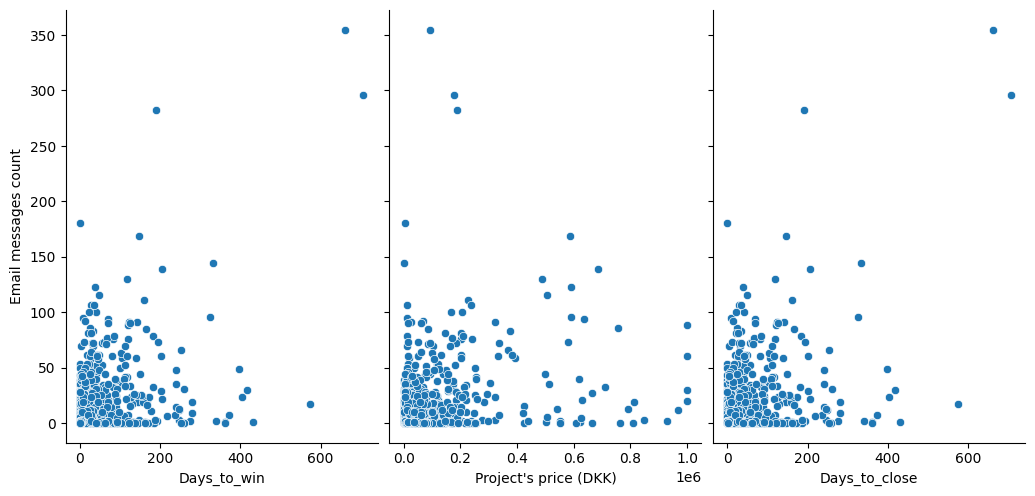

In [132]:
max_value = 1000000

# Filter DataFrame to limit values
df_filtered = df.copy()
df_filtered['Email messages count'] = df_filtered['Email messages count'].clip(upper=max_value)
df_filtered['Days_to_win'] = df_filtered['Days_to_win'].clip(upper=max_value)
df_filtered['Days_to_close'] = df_filtered['Days_to_close'].clip(upper=max_value)
df_filtered["Project's price (DKK)"] = df_filtered["Project's price (DKK)"].clip(upper=max_value)

# Plot with filtered DataFrame
sns.pairplot(df_filtered, x_vars=['Days_to_win', "Project's price (DKK)", 'Days_to_close'],
             y_vars="Email messages count", size=5, aspect=0.7, kind='scatter')
plt.show()


In [ ]:
df["Deal created on"] = pd.to_datetime(df["Deal created on"])
df["Won time"] = pd.to_datetime(df["Won time"])
df["Deal closed on"] = pd.to_datetime(df["Deal closed on"])


In [ ]:
df['Days_to_win'] = (df["Won time"] - df["Deal created on"]).dt.days
df['Days_to_close'] = (df["Deal closed on"] - df["Deal created on"]).dt.days
print(df)


        Organization         Title (Project's name)  Project's price (DKK)  \
0        Customer#:1  Adding Austrian language deal               22510.80   
1        Customer#:2       Site, speed improvements               25012.00   
2        Customer#:3    Help with school assignment                 845.00   
3        Customer#:3                Support Voucher               29363.75   
4        Customer#:4                       Workshop               42250.00   
...              ...                            ...                    ...   
3654  Customer#:1242               New Website deal               67600.00   
3655  Customer#:1243                    new website              929500.00   
3656  Customer#:1244            Conversion API deal               15632.50   
3657  Customer#:1245          Konsulent deal 1 mrd.              189280.00   
3658  Customer#:1245             data-site-intranet              591500.00   

                        How we got the lead?     Deal created o

Vi sletter NaN i datasættet

In [ ]:
df = df.fillna("")
df = df.dropna(axis=0)
df.isna().any(axis=1).sum()

print(df.head)


<bound method NDFrame.head of         Organization                             Title (Project's name)  \
0        Customer#:1                      Adding Austrian language deal   
5        Customer#:5              New Website/webshop - Support Voucher   
34      Customer#:33                              Creating folders deal   
35      Customer#:33                                   Text module deal   
36      Customer#:33             Implementation of systems/plugins deal   
...              ...                                                ...   
3646  Customer#:1240  Optimizing / changing the order export,  Upgra...   
3647  Customer#:1240  Help with the FMK integration and change from ...   
3648  Customer#:1240  Moving integration from Dynamic Web to Umbraco...   
3651  Customer#:1240  New Tasks (Number of remaining packages + chil...   
3652  Customer#:1241  Support Voucher / Summer sale discount / DONG ...   

      Project's price (DKK)  \
0                 22510.800   
5      

Så tilføjer vi en ID column til datasættet og gemmer den nye version


In [ ]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'ID'}, inplace=True)


In [ ]:
df.to_excel("cleanedv2_data_for_KEA.xlsx", index = False)
